In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def bar_number_h(category,value,value2):
    for index in range(len(category)):
        rect=category[index]
        if type(value[index])==type(1): plt.text(value2[index], rect.get_y()+rect.get_height()/2, '%d' %value[index], ha='left', va='center')
        else: plt.text(value2[index], rect.get_y()+rect.get_height()/2, '%0.2f' %value[index], ha='left', va='center')

In [3]:
staff_df = pd.read_csv('dataset/ScraperResult_UC.csv')
relate_tenders_df = pd.read_csv('dataset/research_relevant_2.csv')
tenders_df = pd.read_csv("dataset/tenders_Original.csv")

In [4]:
name_tag_df = staff_df[['Name','StuffTags','ProjectTags']]

In [5]:
name = []
tag_name = []
tag_weight = []
for i in name_tag_df.index:
    n = name_tag_df.loc[i,'Name']
    temp=''
    if(not pd.isnull(name_tag_df.loc[i,'StuffTags'])):
        temp += name_tag_df.loc[i,'StuffTags']
    if(not pd.isnull(name_tag_df.loc[i,'ProjectTags'])):
        temp=temp+'<bk>'+name_tag_df.loc[i,'ProjectTags']
    tags = temp.split('<bk>')
    for tag in tags:
        if len(tag)>0:
            t_w = tag.split('<weight>')

            name.append(n)
            tag_name.append(t_w[0])
            tag_weight.append(int(t_w[1][:-1])/100)



In [6]:
name = []
tag_name = []
tag_weight = []
for i in name_tag_df.index:
    n = name_tag_df.loc[i,'Name']
    temp=''
    if(not pd.isnull(name_tag_df.loc[i,'StuffTags'])):
        temp += name_tag_df.loc[i,'StuffTags']
    tags = temp.split('<bk>')
    for tag in tags:
        if len(tag)>0:
            t_w = tag.split('<weight>')
            name.append(n)
            tag_name.append(t_w[0])
            tag_weight.append(int(t_w[1][:-1])/100)

In [7]:
tag_df2 = pd.DataFrame(None,columns=['Name', 'Tag', 'Weight'])
tag_df2['Name'] = name
tag_df2['Tag'] = tag_name
tag_df2['Weight'] = tag_weight
tag_df2

,Name,Tag,Weight
0,Mohammad Abualsheikh,Wireless sensor networks,1.00
1,Mohammad Abualsheikh,Internet of things,0.93
2,Mohammad Abualsheikh,Big data,0.65
3,Mohammad Abualsheikh,Data Analytics,0.63
4,Mohammad Abualsheikh,Profitability,0.55
...,...,...,...
24611,Li Zhou,aluminum,0.24
24612,Li Zhou,dosage,0.13
24613,Li Zhou,examination,0.08
24614,Li Zhou,strip,0.05


In [8]:
tag_df = pd.DataFrame(None,columns=['Name', 'Tag', 'Weight'])
tag_df['Name'] = name
tag_df['Tag'] = tag_name
tag_df['Weight'] = tag_weight
tag_df

,Name,Tag,Weight
0,Mohammad Abualsheikh,Wireless sensor networks,1.00
1,Mohammad Abualsheikh,Internet of things,0.93
2,Mohammad Abualsheikh,Big data,0.65
3,Mohammad Abualsheikh,Data Analytics,0.63
4,Mohammad Abualsheikh,Profitability,0.55
...,...,...,...
24611,Li Zhou,aluminum,0.24
24612,Li Zhou,dosage,0.13
24613,Li Zhou,examination,0.08
24614,Li Zhou,strip,0.05


In [9]:
# tag_df.to_csv('dataset/staff_name_tag.csv')

In [10]:
# tenders_df.head(1)

In [11]:
tags_df = pd.read_csv("dataset/staff_name_tag.csv")
# tags_df.head(1)

In [12]:
# directly match 
tag_list = list(tag_df2['Tag'].unique())
compare_list = [t.lower() for t in tag_list]
compare_list = set(compare_list)
# len(compare_list)

In [13]:
# relate_tenders_df

In [14]:
temp_df2 = pd.DataFrame(columns = relate_tenders_df.columns)
dic = {}
for t in compare_list:
    res_df = relate_tenders_df[(relate_tenders_df['Description'].str.contains(t))|(relate_tenders_df['Category'].str.contains(t))|(relate_tenders_df['Category'].str.contains(t))].copy()
    for cates in res_df['Category'].values:
        if cates not in dic.keys():dic[cates]=1
        else: dic[cates]+=1    
    temp_df2 = pd.concat((temp_df2,res_df))
    temp_df2.drop_duplicates(subset=['ATM ID','Category'], keep='first', inplace=True)

C:\Users\24966\AppData\Local\Temp/ipykernel_21120/1624996702.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  res_df = relate_tenders_df[(relate_tenders_df['Description'].str.contains(t))|(relate_tenders_df['Category'].str.contains(t))|(relate_tenders_df['Category'].str.contains(t))].copy()


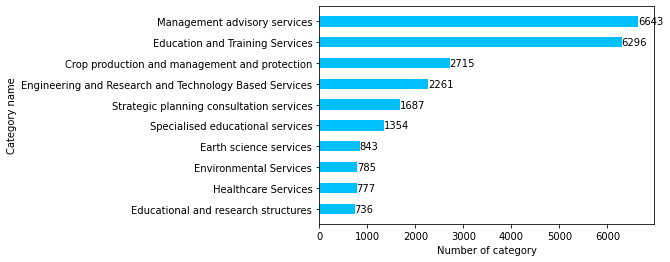

In [16]:
dic = sorted(dic.items(),key=lambda x:x[1],reverse =True)
Y_axis = np.arange(10)
x = [i[1] for i in dic[:10][::-1]]
proportion = plt.barh(Y_axis,x, 0.5, label='number', color='deepskyblue', alpha=1)
bar_number_h(proportion, x, x)

plt.yticks(Y_axis, [i[0] for i in dic[:10]][::-1])
plt.ylabel("Category name")
plt.xlabel("Number of category")
# plt.legend()
plt.show()

In [ ]:
cate_list = list(temp_df2['Category'].unique())
dic = {}
for cate in cate_list:
    dic[cate] = len(temp_df2[temp_df2['Category']==cate])
dic = sorted(dic.items(),key=lambda x:x[1],reverse =True)
Y_axis = np.arange(10)
x = [i[1] for i in dic[:10][::-1]]
proportion = plt.barh(Y_axis,x, 0.5, label='number', color='deepskyblue', alpha=1)
bar_number_h(proportion, x, x)

plt.yticks(Y_axis, [i[0] for i in dic[:10]][::-1])
plt.ylabel("Category name")
plt.xlabel("Number of category")
# plt.legend()
plt.show()

In [25]:
temp_df2 = pd.DataFrame(columns = tenders_df.columns)
for t in compare_list:
    res_df = tenders_df[(tenders_df['Description'].str.contains(t))|(tenders_df['Category'].str.contains(t))|(tenders_df['Category'].str.contains(t))].copy()
    temp_df2 = pd.concat((temp_df2,res_df))
    temp_df2.drop_duplicates(subset=['ATM ID','Category'], keep='first', inplace=True)

C:\Users\24966\AppData\Local\Temp/ipykernel_13972/3959271151.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  res_df = tenders_df[(tenders_df['Description'].str.contains(t))|(tenders_df['Category'].str.contains(t))|(tenders_df['Category'].str.contains(t))].copy()


KeyboardInterrupt: 

In [18]:
temp_df2

,ATM ID,Category,Description,Title,_id
466,2006/18,Education and Training Services,"On 28 April 2006, the Minister for Employment ...",National Adviser Network Programme,6162aa1fe1b7f5c73e6fe1a2
494,003/0607DEH,Environmental Services,The Department of the Environment and Heritage...,Research Project: Mulga Harvesting in the Quil...,6162aa1fe1b7f5c73e6fe1be
1422,RFT 12.15,Education and Training Services,The Australian Taxation Office (ATO) requires ...,Provision of Contact Centre Management training,6162aa1fe1b7f5c73e6fe55e
1772,2015.01.10,Crop production and management and protection,Request for Tender for the provision of improv...,Improvement of On-Farm Grain Storage Managemen...,6162aa1fe1b7f5c73e6fe6bc
2113,PROC-9175513,Crop production and management and protection,GRDC invites tenders from suitable contractor(...,Manage risk & opportunities to improve farm pr...,6162aa1fe1b7f5c73e6fe811
...,...,...,...,...,...
892,PRN18422,Educational and research structures,TRAINING AND RECRUITMENT BENCHMARKS FOR EMPLOY...,Training and Recruitment Benchmarks for Employ...,6162aa1fe1b7f5c73e6fe34c
910,EOI PRN 16021,Educational and research structures,EOI for Stage 2 of the National Student Aptitu...,National Student Aptitude Test for Tertiary Ad...,6162aa1fe1b7f5c73e6fe35e
572,039/06,Disease prevention and control,A Managing Contractor is sought to establish a...,HIV/AIDS Asia Regional Program (HAARP) - Regio...,6162aa1fe1b7f5c73e6fe20c
1535,DoHA/210/1213,Disease prevention and control,Provision of the Department of Health and Agei...,Provision of the Department of Health and Agei...,6162aa1fe1b7f5c73e6fe5cf


In [22]:
len(relate_tenders_df)

2697

In [33]:
# directly match 
tag_list = list(tags_df['Tag'].unique())
compare_list = [t.lower() for t in tag_list]
#     for i in t.split(' '): compare_list.append(i)
compare_list = set(compare_list)
# compare_list
temp_df = pd.DataFrame(columns = tenders_df.columns)
for t in compare_list:
    res_df = tenders_df[(tenders_df['Description'].str.contains(t))|(tenders_df['Category'].str.contains(t))|(tenders_df['Category'].str.contains(t))].copy()
    temp_df = pd.concat((temp_df,res_df))
    temp_df.drop_duplicates(subset=['ATM ID','Category'], keep='first', inplace=True)

C:\Users\24966\AppData\Local\Temp/ipykernel_13972/1502460402.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  res_df = tenders_df[(tenders_df['Description'].str.contains(t))|(tenders_df['Category'].str.contains(t))|(tenders_df['Category'].str.contains(t))].copy()


In [20]:
remain_df = tenders_df[~tenders_df['ATM ID'].isin(temp_df['ATM ID'])].copy()

NameError: name 'temp_df' is not defined

In [36]:
len(temp_df)/len(tenders_df)

0.9568292050797882

In [43]:
cate_list = list(remain_df['Category'].unique())
dic = {}
for cate in cate_list:
    dic[cate] = len(remain_df[remain_df['Category']==cate])
dic = sorted(dic.items(),key=lambda x:x[1],reverse =True)

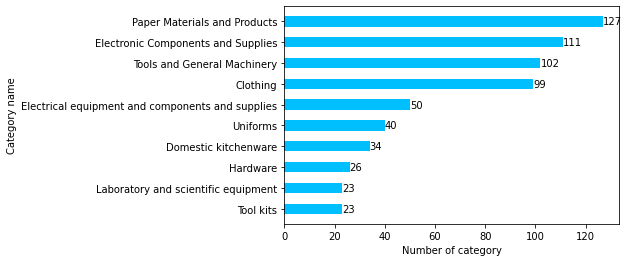

In [44]:
Y_axis = np.arange(10)
x = [i[1] for i in dic[:10][::-1]]
proportion = plt.barh(Y_axis,x, 0.5, label='number', color='deepskyblue', alpha=1)
bar_number_h(proportion, x, x)

plt.yticks(Y_axis, [i[0] for i in dic[:10]][::-1])
plt.ylabel("Category name")
plt.xlabel("Number of category")
# plt.legend()
plt.show()